In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, roc_curve, confusion_matrix

## Preliminary data exploration

In [2]:
df = pd.read_csv('./dataset_diabetes/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.patient_nbr.value_counts().value_counts()

1     54745
2     10434
3      3328
4      1421
5       717
6       346
7       207
8       111
9        70
10       42
11       20
12       19
13       14
15        9
18        6
20        6
14        5
16        4
17        3
19        3
23        3
22        2
28        1
21        1
40        1
Name: patient_nbr, dtype: int64

In [9]:
# how to distinguish one encounter from another for same patient? no date

# df[df['patient_nbr'] == 88785891]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38307,119039172,88785891,Caucasian,Female,[20-30),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
40252,125094312,88785891,Caucasian,Female,[20-30),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,<30
40661,126171582,88785891,Caucasian,Female,[20-30),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,>30
44515,137245596,88785891,Caucasian,Female,[20-30),?,3,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45147,139425576,88785891,Caucasian,Female,[20-30),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45986,141994242,88785891,Caucasian,Female,[20-30),?,2,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50167,150986298,88785891,Caucasian,Female,[20-30),?,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50393,151413846,88785891,Caucasian,Female,[20-30),?,1,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50773,152188656,88785891,Caucasian,Female,[20-30),?,2,7,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
51519,153558456,88785891,Caucasian,Female,[20-30),?,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30


In [9]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [10]:
def convert_readmission(data):
    if data == 'NO':
        data = 0
    elif (data == '>30' or data == '<30'):
        data = 1
    return data
        

To turn target into 2 classes, will go with "NO readmission" vs. "readmission" (which includes >30 days and <30 days).

In [12]:
df['target'] = df['readmitted'].apply(lambda x: convert_readmission(x))

In [14]:
df.target.value_counts()

0    54864
1    46902
Name: target, dtype: int64

In [15]:
# most common primary diagnoses: 428-heart failure, 414-Other forms of chronic ischemic heart disease, 786-respiratory system/chest
df.diag_1.value_counts()

#related to macrovascular complications of DM?

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: diag_1, Length: 717, dtype: int64

In [16]:
# most common secondary diagnoses: 276-fluid/electrolyte, 428-complications heart disease, 250-diabetes
df.diag_2.value_counts()

#related to dka/hhs?

276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
E918       1
46         1
V13        1
E850       1
927        1
Name: diag_2, Length: 749, dtype: int64

In [17]:
# most common tertiary diagnoses: 250-diabetes, 401-hypertension, 276- fluid/electrolyte
df.diag_3.value_counts()

250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         1
Name: diag_3, Length: 790, dtype: int64

In [18]:
df.age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [19]:
df.discharge_disposition_id.value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [18]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [21]:
#weight in pounds is mostly unknown 
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

Patient identifer??



Columns I want to try for features:
- age
- time in hospital x 
- medical specialty
- number of procedures x 
- number of medications (during encounter) x
- number of outpatient visits x 
- number of emergency visits  x
- number of inpatient visits x
- diagnosis 1, 2, 3
- number of diagnoses x 
- a1c
- serum glucose 
- change in diabetes meds (med itself or dosage) y/n
- diabetes meds

Feature interaction:
- change in meds x diabetes meds 


To reduce confounding of results, as many patients appear more than once in dataset as separate encounters (with no dates), I will take only the first encounter for a patient (if multiple for that patient)

In [46]:
smaller_df = df.drop_duplicates(subset=['patient_nbr'])

In [48]:
smaller_df.to_csv('unique_patients.csv')

## Baseline model

In [4]:
smaller_df = pd.read_csv('unique_patients.csv')

In [5]:
smaller_df.target.value_counts()

0    42985
1    28533
Name: target, dtype: int64

In [6]:
#after fixing any nulls 
numerical_df = smaller_df[['number_diagnoses', 'time_in_hospital', 'number_emergency', 'number_outpatient', 'number_inpatient', 'num_medications', 'num_procedures', 'target']]

In [7]:
numerical_df.head()

,number_diagnoses,time_in_hospital,number_emergency,number_outpatient,number_inpatient,num_medications,num_procedures,target
0,1,1,0,0,0,1,0,0
1,9,3,0,0,0,18,0,1
2,6,2,0,2,1,13,5,0
3,7,2,0,0,0,16,1,0
4,5,1,0,0,0,8,0,0


In [9]:
sample = numerical_df.sample(1000).reset_index()

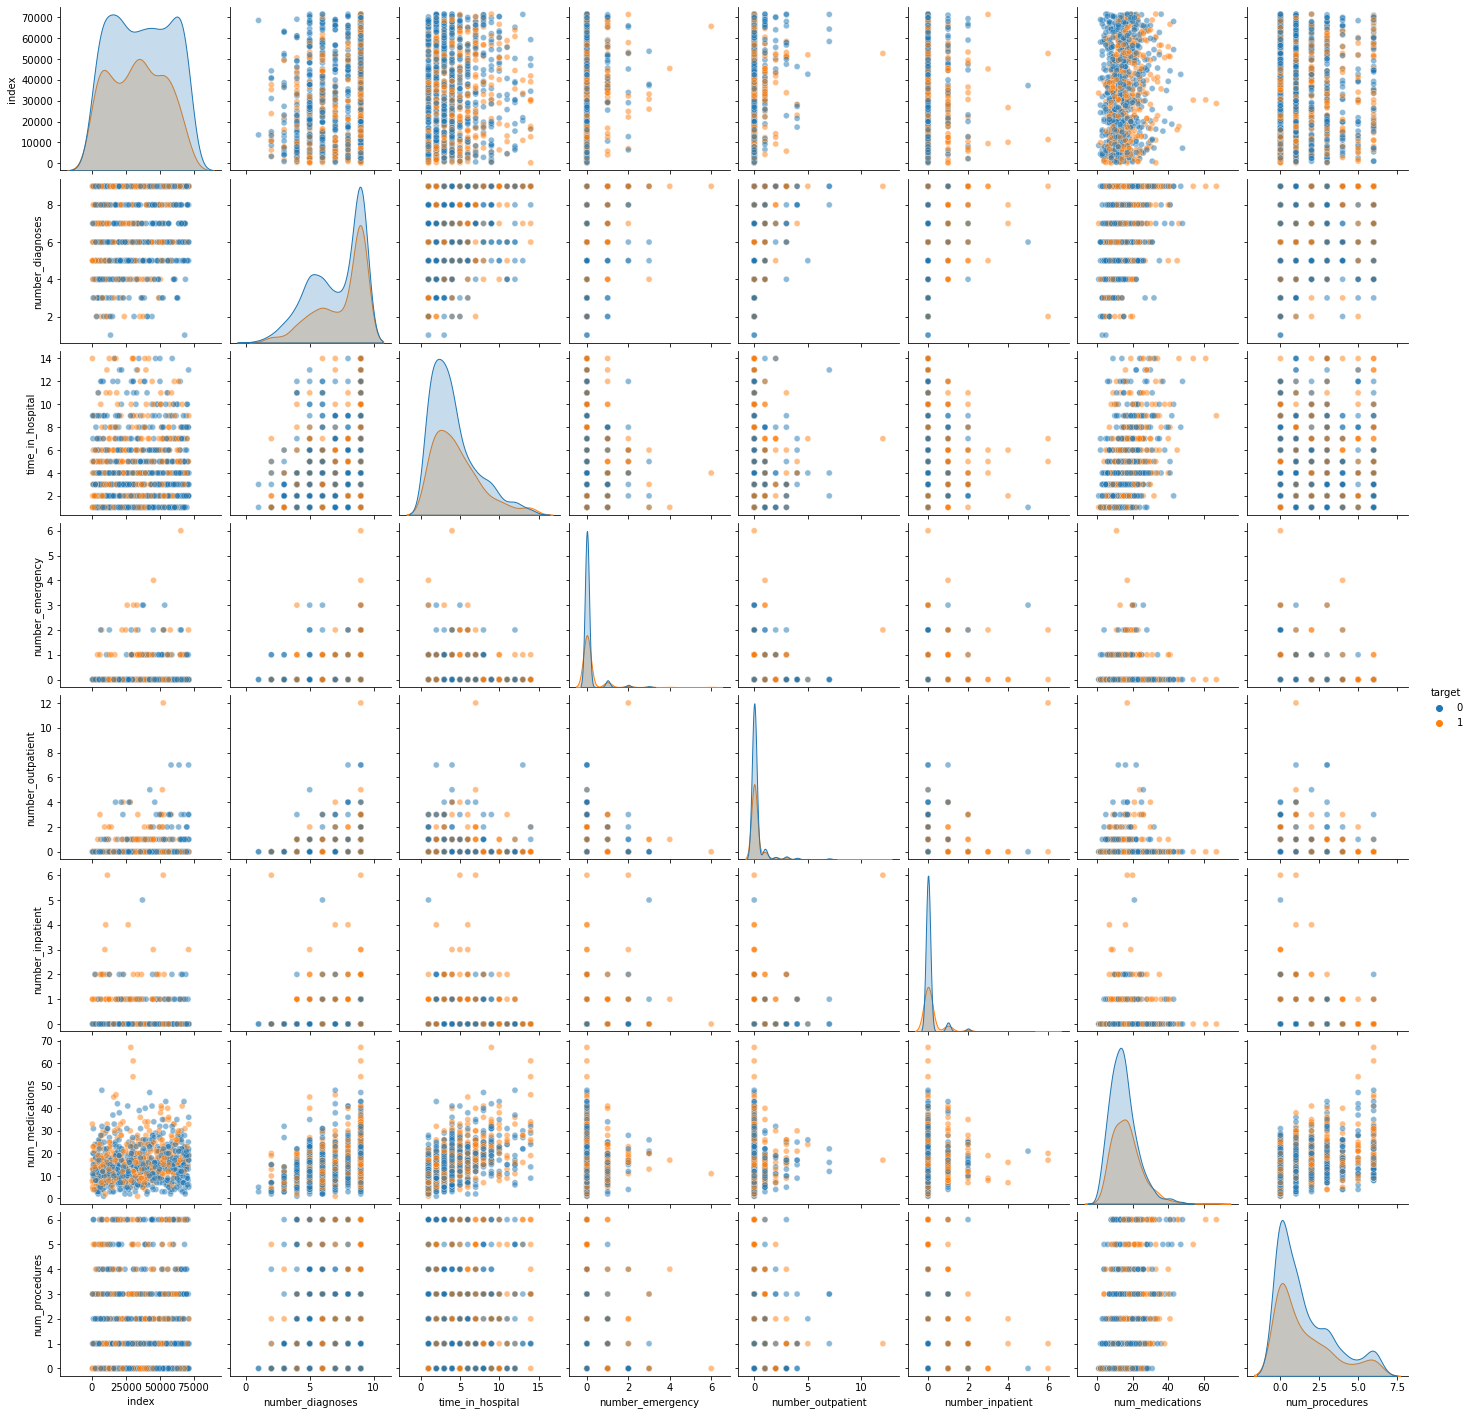

In [10]:
sns.pairplot(sample, hue='target', plot_kws={'alpha':0.5})


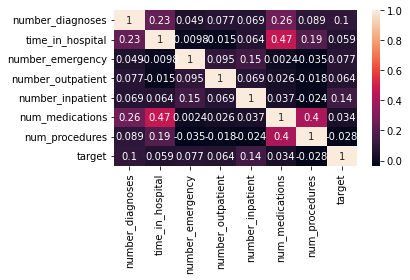

In [19]:
sns.heatmap(numerical_df.corr(), annot=True)
plt.tight_layout()
plt.savefig('numerical_heatmap')
#seeing if any features highly correlated

Nothing really stands out in sample pairplot, except maybe number_diagnoses (but this is only sample of 500 out of 70000). Will just proceed

In [12]:
X = numerical_df.drop(columns=['target'])
y = numerical_df['target']

In [13]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [14]:
logit = LogisticRegression(C = 1) #no regularization for now
logit.fit(X_train, y_train)
print("The accuracy score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

The accuracy score for logistic regression is
Training:  62.36%
Test set:  62.39%


In [15]:
y_predict = logit.predict(X_test)
print("Baseline scores:")
print("Precision: {:6.4f},   Recall: {:6.4f},  F1 score: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict), f1_score(y_test, y_predict)))

Baseline scores:
Precision: 0.6062,   Recall: 0.1590,  F1 score: 0.2519


In [16]:
#confusion matrix 
logit_confusion = confusion_matrix(y_test, y_predict)

In [17]:
logit_confusion 

array([[12027,   883],
       [ 7187,  1359]])

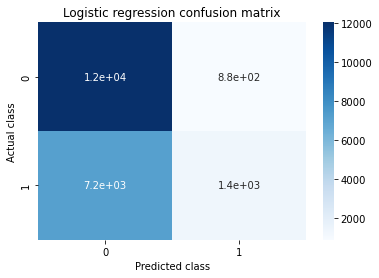

In [18]:
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True)

plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Logistic regression confusion matrix')
plt.savefig('baseline_cm')

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])

ROC AUC score =  0.60957855904611


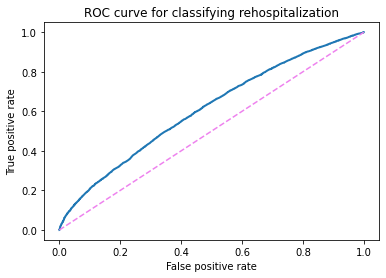

In [17]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for classifying rehospitalization');
print("ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

## Data Preprocessing

In [20]:
smaller_df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,target
0,0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,NO,0
1,1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,Yes,NO,0
3,3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


First, to reduce bias in answering question of rehospitalization, I want to make sure patient's discharge status is not hospice or expired or missing.

In [8]:
#DELETE rows that have patients expired or hospice upon discharge or NULL, as well as patients admitted immediately,
#from documentation of discharge_disposition_id
discharge_expired = [11,18,19,20,21,25,26,13,14]
discharge_home = [1,6,8]
left_ama = 7
discharge_healthcare = [2,3,4,5,15,16,17,22,23,24,30,27,28,29,10]
still_patient = [9,12]

In [9]:
len(discharge_expired + discharge_home + [left_ama] + discharge_healthcare + still_patient)

30

In [10]:
smaller_df = smaller_df[~(smaller_df.discharge_disposition_id.isin(discharge_expired) | smaller_df.discharge_disposition_id.isin(still_patient))]

In [11]:
#delete rows that have admission type unavailable 
smaller_df = smaller_df[~smaller_df.admission_type_id.isin([5,6,8])]

#### Summary:
Adding in more columns by converting categorical/grouping. Dropped a level during one-hot encoding.
- Discharge status (dropped: discharge to healthcare)
- Admission (dropped: Newborn)
- Age group (dropped: [0-10))
- A1c (droppped: Norm)
- Max Glu Serum (dropped: Norm)
- Diabetes medications (kept same dose or not on med = 0, increase/decrease dose = 1)
- Diagnoses (1,2, and 3) - categorizing just top 5 for each and grouping rest as "Other", then binarize (dropped 'Other' category for each)


Originally considered but ended up not using
- Medical specialty (30k null values, likely could be inconsistent categorization as patients can get transferred through specialties)

In [12]:
def categor_discharge(x):
    if x in discharge_home:
        x = 'Dis_Home'
    elif x == left_ama:
        x = 'Dis_AMA'
    elif x in discharge_healthcare:
        x = 'Dis_Healthcare'
    elif x in still_patient:
        x = 'Dis_Patient'
    else:
        x = 'Other'
    return x

In [13]:
smaller_df['discharge'] = smaller_df.discharge_disposition_id.apply(categor_discharge)

In [14]:
smaller_df.discharge.value_counts()

Dis_Home          47332
Dis_Healthcare    11893
Dis_AMA             364
Name: discharge, dtype: int64

In [15]:
#binarize discharge and admission_type_id

In [16]:
discharge_dummies = pd.get_dummies(smaller_df.discharge).drop(columns=['Dis_Healthcare'])

In [17]:
#convert admission id to type using ID mapping guide
def categor_admit(x):
    if x == 1 :
        x = 'Ad_Emergency'
    elif x == 2:
        x = 'Ad_Urgent'
    elif x == 3:
        x = 'Ad_Elective'
    elif x == 7:
        x = 'Ad_Trauma'
    elif x == 4:
        x = 'Ad_Newborn'
    return x

In [18]:
smaller_df['admission'] = smaller_df.admission_type_id.apply(categor_admit)

In [19]:
admission_dummies = pd.get_dummies(smaller_df.admission).drop(columns=['Ad_Newborn'])

In [20]:
age_dummies = pd.get_dummies(smaller_df.age).drop(columns=['[0-10)'])

In [21]:
age_dummies.columns = ['Age' + x for x in age_dummies.columns]

In [22]:
#df_age = numerical_df.merge(age_dummies, left_index = True, right_index = True)

In [23]:
#df_age.head()

In [24]:
a1c_dummies = pd.get_dummies(smaller_df.A1Cresult).drop(columns=['Norm'])
#category of "None" can be interesting in this case -- could have omitted accidentally or on purpose (e.g., pt had older A1c value that was used)

In [25]:
a1c_dummies.columns = ['A1c:' + x for x in a1c_dummies.columns]

In [26]:
glu_dummies = pd.get_dummies(smaller_df.max_glu_serum).drop(columns=['Norm'])

In [27]:
glu_dummies.columns = ['Max Glu:' + x for x in glu_dummies.columns]

In [28]:
def dose_adjust(med):
    if med == 'Steady':
        adj = 0
    elif med == 'No':
        adj = 0
    elif med == 'Up':
        adj = 1
    elif med == 'Down':
        adj = 1
    return adj

In [29]:
smaller_df[['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']] = smaller_df[['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']].applymap(dose_adjust)

In [30]:
smaller_df.diabetesMed.value_counts()
#mostly have diabetes meds; may be redundant if include this along with the actual meds 

Yes    45825
No     13764
Name: diabetesMed, dtype: int64

In [31]:
#double checking that pt can be have more than 1 med changed during single encounter
#smaller_df[(smaller_df.metformin == 1) & (smaller_df.glipizide == 1)]

Only keeping most common diagnoses (for diag_1, diag_2, and diag_3) and grouping rest as Other. Limitation is that could miss some similar diagnoses (if ICD9 code is more specific with decimal, vs. not)

In [32]:
diag_1s = smaller_df.diag_1.value_counts()

In [33]:
top_diag_1s = list(diag_1s[:5].index)

In [34]:
def replace_other(x, top):
    if x not in top:
        x = 'Other'
    return x

In [35]:
smaller_df['diag_1'] = smaller_df['diag_1'].apply(lambda x: replace_other(x, top_diag_1s))

In [36]:
diag_2s = smaller_df.diag_2.value_counts()

In [37]:
top_diag_2s = list(diag_2s[:5].index)

In [38]:
smaller_df['diag_2'] = smaller_df['diag_2'].apply(lambda x: replace_other(x, top_diag_2s))

In [39]:
diag_3s = smaller_df.diag_3.value_counts()

In [40]:
top_diag_3s = list(diag_3s[:5].index)

In [41]:
smaller_df['diag_3'] = smaller_df['diag_3'].apply(lambda x: replace_other(x, top_diag_3s))

In [42]:
print(top_diag_1s)
print(top_diag_2s)
print(top_diag_3s)
#interesting bc icd-9 code 250 is for diabetes -- makes sense either secondary or tertiary diagnosis

['414', '428', '786', '410', '486']
['250', '276', '428', '427', '401']
['250', '401', '276', '428', '414']


In [43]:
smaller_df['diag_1'].value_counts()

Other    45086
414       4395
428       3303
786       2469
410       2323
486       2013
Name: diag_1, dtype: int64

In [44]:
smaller_df['diag_2'].value_counts()

Other    42493
250       4129
276       3916
428       3548
427       2916
401       2587
Name: diag_2, dtype: int64

In [45]:
smaller_df['diag_3'].value_counts()

Other    38987
250       7518
401       5548
276       2926
428       2392
414       2218
Name: diag_3, dtype: int64

In [46]:
#dropping least common dummies 
diag1_dummies = pd.get_dummies(smaller_df.diag_1).drop(columns=['Other'])
diag2_dummies = pd.get_dummies(smaller_df.diag_2).drop(columns=['Other'])
diag3_dummies = pd.get_dummies(smaller_df.diag_3).drop(columns=['Other'])


In [47]:
diag1_dummies.columns = ['Diag 1:' + x for x in diag1_dummies.columns]
diag2_dummies.columns = ['Diag 2:' + x for x in diag2_dummies.columns]
diag3_dummies.columns = ['Diag 3:' + x for x in diag3_dummies.columns]

### Making the dataframes (merge)

In [48]:
numerical_df = smaller_df[['number_diagnoses', 'time_in_hospital', 'number_emergency', 'number_outpatient', 'number_inpatient', 'num_medications', 'num_procedures', 'target']]

In [49]:
meds_df = smaller_df[['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]

In [49]:
meds_df.describe()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
count,59589.000000,59589.000000,59589.000000,59589.000000,59589.000000,59589.0,59589.000000,59589.000000,59589.0,59589.000000,...,59589.0,59589.0,59589.0,59589.0,59589.000000,59589.000000,59589.0,59589.0,59589.0,59589.0
mean,0.017973,0.001577,0.000369,0.000067,0.005353,0.0,0.013106,0.013560,0.0,0.003625,...,0.0,0.0,0.0,0.0,0.205608,0.000168,0.0,0.0,0.0,0.0
std,0.132855,0.039686,0.019211,0.008193,0.072971,0.0,0.113732,0.115654,0.0,0.060098,...,0.0,0.0,0.0,0.0,0.404149,0.012953,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0


In [50]:
#some meds have no one on them:
meds_none = list(meds_df[meds_df.columns[meds_df.describe().iloc[1]==0]])

In [51]:
meds_df = meds_df.drop(columns=meds_none)

Going to combine some medications into classes: summing up because some patients may be on more than one in same class (even if not best practice)
- meglitinide_class: repaglinide, nateglinide
- sulfonylurea_class: chlorpropamide, glimepiride, glipizide, glyburide
- tzd_class: pioglitazone, rosiglitazone
- agi_class: miglitol, acarbose

In [52]:
#combing some classes 

meds_df['meglitinide_class'] = meds_df.repaglinide + meds_df.nateglinide


In [53]:
meds_df['sulfonylurea_class'] = meds_df.chlorpropamide + meds_df.glimepiride + meds_df.glipizide + meds_df.glyburide
meds_df['tzd_class'] = meds_df.rosiglitazone + meds_df.pioglitazone
meds_df['agi_class'] = meds_df.miglitol + meds_df.acarbose

In [54]:
meds_smaller = meds_df[['metformin','insulin',
       'glyburide-metformin', 'meglitinide_class', 'sulfonylurea_class',
       'tzd_class', 'agi_class']]

In [55]:
full_frames = [discharge_dummies, admission_dummies, age_dummies, a1c_dummies, 
          glu_dummies, meds_smaller, diag1_dummies, diag2_dummies, diag3_dummies]

In [56]:
df1 = numerical_df.join(full_frames, how='inner')

In [71]:
fig, ax = plt.subplots(figsize=(50,50))  
sns.heatmap(df1.corr(), ax=ax, annot=True)

<AxesSubplot:>

Error in callback <function flush_figures at 0x15a6feb80> (for post_execute):


KeyboardInterrupt: 

In [57]:
df2 = df1.copy()

In [58]:
df2.columns

Index(['number_diagnoses', 'time_in_hospital', 'number_emergency',
       'number_outpatient', 'number_inpatient', 'num_medications',
       'num_procedures', 'target', 'Dis_AMA', 'Dis_Home', 'Ad_Elective',
       'Ad_Emergency', 'Ad_Trauma', 'Ad_Urgent', 'Age[10-20)', 'Age[20-30)',
       'Age[30-40)', 'Age[40-50)', 'Age[50-60)', 'Age[60-70)', 'Age[70-80)',
       'Age[80-90)', 'Age[90-100)', 'A1c:>7', 'A1c:>8', 'A1c:None',
       'Max Glu:>200', 'Max Glu:>300', 'Max Glu:None', 'metformin', 'insulin',
       'glyburide-metformin', 'meglitinide_class', 'sulfonylurea_class',
       'tzd_class', 'agi_class', 'Diag 1:410', 'Diag 1:414', 'Diag 1:428',
       'Diag 1:486', 'Diag 1:786', 'Diag 2:250', 'Diag 2:276', 'Diag 2:401',
       'Diag 2:427', 'Diag 2:428', 'Diag 3:250', 'Diag 3:276', 'Diag 3:401',
       'Diag 3:414', 'Diag 3:428'],
      dtype='object')

In [59]:
def hf_tzd(row):
    result = 0 
    if (row['Diag 1:428'] == 1 or row['Diag 2:428'] or row['Diag 3:428']== 1):
        if row['tzd_class'] >= 1:
            result = 1
    return result
            

In [60]:
df2['hf_and_tzd'] = df2.apply(hf_tzd, axis=1)

In [61]:
df2['hf_and_tzd'].value_counts()

0    59529
1       60
Name: hf_and_tzd, dtype: int64

## Modeling

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier

In [63]:
X = df1.drop(columns=['target'])
y = df1['target']

In [64]:
#60/20/20 split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.2, random_state=28)

In [65]:
#2nd version after adding new column (interaction)
X2 = df2.drop(columns=['target'])
y2 = df2['target']

In [66]:
#60/20/20 split
X2_tr, X2_test, y2_tr, y2_test = train_test_split(X2, y2, test_size=.2, random_state=28)

### Random Forest

In [67]:
df1.target.value_counts()

0    35615
1    23974
Name: target, dtype: int64

In [68]:
rf = RandomForestClassifier()
rf.fit(X_tr,y_tr)

RandomForestClassifier()

In [69]:
def cross_val(model, X_train, y_train, num_folds):
    cv_results = cross_validate(model, X_train, y_train, cv=num_folds, scoring=('accuracy', 'f1', 'precision', 'recall', 'roc_auc'), return_train_score=True)
    print('Training scores:')
    print('Avg Accuracy: ', round(np.mean(cv_results['train_accuracy']), 4))
    print('Avg F1: ', round(np.mean(cv_results['train_f1']),4))
    print('Avg Precision: ', round(np.mean(cv_results['train_precision']),4))
    print('Avg Recall: ', round(np.mean(cv_results['train_recall']), 4))
    print('Avg ROC AUC:', round(np.mean(cv_results['train_roc_auc']), 4))
    print('\nTest scores:')
    print('Avg Accuracy: ', round(np.mean(cv_results['test_accuracy']), 4))
    print('Avg F1: ', round(np.mean(cv_results['test_f1']),4))
    print('Avg Precision: ', round(np.mean(cv_results['test_precision']),4))
    print('Avg Recall: ', round(np.mean(cv_results['test_recall']), 4))
    print('Avg ROC AUC:', round(np.mean(cv_results['test_roc_auc']), 4))

In [79]:
cross_val(rf, X_tr, y_tr, 5)

Training scores:
Avg Accuracy:  0.9914
Avg F1:  0.9893
Avg Precision:  0.9916
Avg Recall:  0.987
Avg ROC AUC: 0.9997

Test scores:
Avg Accuracy:  0.5977
Avg F1:  0.4173
Avg Precision:  0.5017
Avg Recall:  0.3572
Avg ROC AUC: 0.5946


In [177]:
rf2 = RandomForestClassifier()
rf2.fit(X2_tr, y2_tr)

RandomForestClassifier()

In [178]:
cross_val(rf2, X2_tr, y2_tr, 5)

Training scores:
Avg Accuracy:  0.9914
Avg F1:  0.9893
Avg Precision:  0.992
Avg Recall:  0.9866
Avg ROC AUC: 0.9997

Test scores:
Avg Accuracy:  0.5976
Avg F1:  0.4183
Avg Precision:  0.5014
Avg Recall:  0.3588
Avg ROC AUC: 0.5955


In [71]:
X2_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47671 entries, 67178 to 53042
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   number_diagnoses     47671 non-null  int64
 1   time_in_hospital     47671 non-null  int64
 2   number_emergency     47671 non-null  int64
 3   number_outpatient    47671 non-null  int64
 4   number_inpatient     47671 non-null  int64
 5   num_medications      47671 non-null  int64
 6   num_procedures       47671 non-null  int64
 7   Dis_AMA              47671 non-null  uint8
 8   Dis_Home             47671 non-null  uint8
 9   Ad_Elective          47671 non-null  uint8
 10  Ad_Emergency         47671 non-null  uint8
 11  Ad_Trauma            47671 non-null  uint8
 12  Ad_Urgent            47671 non-null  uint8
 13  Age[10-20)           47671 non-null  uint8
 14  Age[20-30)           47671 non-null  uint8
 15  Age[30-40)           47671 non-null  uint8
 16  Age[40-50)        

In [86]:
#hyperparameter tuning
param_grid = {
    'max_depth': [30, 40],
    'max_features': ['auto',10, 20],
    'class_weight': ['balanced', None]}


tuning_rf = GridSearchCV(rf, param_grid, cv=5, scoring=('accuracy', 'f1', 'precision', 'recall'), refit='f1', return_train_score=True)
forest = tuning_rf.fit(X_tr, y_tr)

tuning_rf_cv = pd.DataFrame(tuning_rf.cv_results_)

In [87]:
tuning_rf_cv.T.loc['mean_test_accuracy']

0      0.60154
1     0.598372
2     0.595372
3      0.59812
4     0.598162
5     0.594491
6     0.608126
7     0.606322
8     0.600638
9     0.600533
10    0.600323
11    0.596274
Name: mean_test_accuracy, dtype: object

In [88]:
tuning_rf_cv.T.loc['mean_train_accuracy']

0     0.978687
1     0.982521
2      0.98625
3     0.991121
4     0.991232
5     0.991294
6     0.968277
7      0.97414
8     0.981519
9     0.990964
10    0.991216
11      0.9913
Name: mean_train_accuracy, dtype: object

In [89]:
tuning_rf_cv.T.loc['mean_test_f1']

0     0.442884
1     0.436469
2      0.43565
3     0.420495
4     0.419399
5     0.421486
6     0.405046
7     0.410082
8     0.418874
9     0.420419
10    0.425497
11    0.426439
Name: mean_test_f1, dtype: object

In [92]:
tuning_rf_cv
#best: F1 of 0.443
#max_depth: 30
#n_estimators: 100
#max_features: auto
#class_weight: balanced 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall
0,4.973218,1.166429,0.401119,0.162402,balanced,30,auto,"{'class_weight': 'balanced', 'max_depth': 30, ...",0.604510,0.596497,...,0.392852,0.007472,1,0.973010,0.972166,0.974963,0.974117,0.975028,0.973857,0.001117
1,4.753130,0.227424,0.260924,0.011255,balanced,30,10,"{'class_weight': 'balanced', 'max_depth': 30, ...",0.602202,0.596182,...,0.385828,0.008868,3,0.976392,0.976263,0.980295,0.978800,0.979580,0.978266,0.001652
2,7.169771,0.174675,0.245051,0.007349,balanced,30,20,"{'class_weight': 'balanced', 'max_depth': 30, ...",0.601259,0.589784,...,0.387389,0.007669,2,0.984847,0.981661,0.985563,0.984913,0.985108,0.984418,0.001401
3,4.290320,0.184002,0.295112,0.022872,balanced,40,auto,"{'class_weight': 'balanced', 'max_depth': 40, ...",0.600420,0.593979,...,0.361636,0.005172,7,0.991025,0.990375,0.990830,0.992651,0.990830,0.991142,0.000784
4,5.261191,0.338591,0.274535,0.008258,balanced,40,10,"{'class_weight': 'balanced', 'max_depth': 40, ...",0.600629,0.593560,...,0.359971,0.004577,8,0.991805,0.990765,0.990830,0.992261,0.991676,0.991468,0.000581
5,7.780911,0.571948,0.257678,0.011340,balanced,40,20,"{'class_weight': 'balanced', 'max_depth': 40, ...",0.600944,0.592616,...,0.366370,0.004264,6,0.992066,0.991286,0.991091,0.992131,0.991416,0.991598,0.000422
6,3.818935,0.075672,0.252508,0.015033,None,30,auto,"{'class_weight': None, 'max_depth': 30, 'max_f...",0.610907,0.602266,...,0.330836,0.003413,12,0.921631,0.922677,0.925538,0.926058,0.923847,0.923950,0.001672
7,4.899319,0.267525,0.265043,0.021296,None,30,10,"{'class_weight': None, 'max_depth': 30, 'max_f...",0.609649,0.600902,...,0.339369,0.003735,11,0.938150,0.942772,0.936789,0.937374,0.939130,0.938843,0.002115
8,7.282350,0.480352,0.241746,0.011886,None,30,20,"{'class_weight': None, 'max_depth': 30, 'max_f...",0.604195,0.590308,...,0.357005,0.008759,10,0.957921,0.957924,0.957014,0.959030,0.957664,0.957911,0.000651
9,4.189051,0.067095,0.277827,0.005278,None,40,auto,"{'class_weight': None, 'max_depth': 40, 'max_f...",0.604405,0.595028,...,0.359398,0.009450,9,0.983806,0.983742,0.983352,0.984587,0.983417,0.983781,0.000440


In [133]:
y_predict = forest.predict(X_test)
forest_confusion = confusion_matrix(y_test, y_predict)

In [134]:
forest_confusion

array([[6164, 1001],
       [3408, 1345]])

In [186]:
tuning_rf_cv.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy',
       'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy',
       'split1_train_accuracy', 'split2_train_accuracy',
       'split3_train_accuracy', 'split4_train_accuracy', 'mean_train_accuracy',
       'std_train_accuracy', 'split0_test_f1', 'split1_test_f1',
       'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1',
       'std_test_f1', 'rank_test_f1', 'split0_train_f1', 'split1_train_f1',
       'split2_train_f1', 'split3_train_f1', 'split4_train_f1',
       'mean_train_f1', 'std_train_f1', 'split0_test_precision',
       'split1_test_precision', 'split2_test_precision',
       'split3_test_precision', 'split4_test_precision', 'mean_test_precision',
       'std_t

In [85]:
from sklearn.inspection import permutation_importance

#start_time = time.time()
result = permutation_importance(forest, X_test, y_test, scoring = ('accuracy', 'f1', 'precision', 'recall', 'roc_auc'))
#elapsed_time = time.time() - start_time
#print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


In [86]:
result.keys()

dict_keys(['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [87]:
feature_names = list(X.columns)

In [88]:
forest_accuracy_importances = pd.Series(result['accuracy'].importances_mean, index=feature_names)

In [94]:
forest_accuracy_importances.abs().sort_values(ascending=False)[:30]

number_inpatient     0.019601
number_emergency     0.008961
number_outpatient    0.008089
number_diagnoses     0.004883
Diag 1:428           0.004363
num_procedures       0.002366
Age[80-90)           0.001997
num_medications      0.001980
Age[70-80)           0.001510
Age[90-100)          0.001410
A1c:>8               0.001393
Diag 1:786           0.001225
Diag 2:427           0.001191
Diag 3:401           0.001141
Diag 2:428           0.000957
Diag 2:276           0.000873
Age[30-40)           0.000856
time_in_hospital     0.000856
insulin              0.000839
Age[60-70)           0.000806
Ad_Urgent            0.000772
Age[50-60)           0.000722
Max Glu:None         0.000638
Diag 1:410           0.000638
Diag 3:414           0.000453
Diag 3:250           0.000453
A1c:None             0.000453
glyburide            0.000436
Age[20-30)           0.000436
Diag 1:414           0.000403
dtype: float64

In [223]:
import matplotlib.pyplot as plt

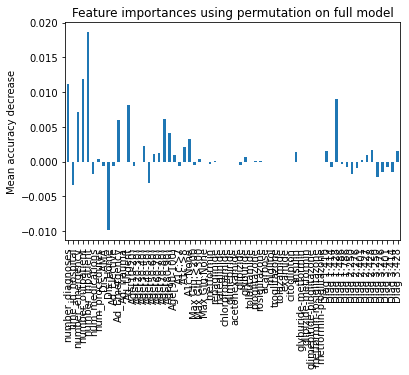

In [235]:
fig, ax = plt.subplots()
forest_f1_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
# ax.set_ylabel("Mean accuracy decrease") #what is y-axis??
#fig.tight_layout()
plt.show()

### Logistic Regression

In [62]:
from sklearn.preprocessing import StandardScaler

In [147]:
# scale data first 

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_tr)

logreg = LogisticRegression()

In [114]:
cv_results

{'fit_time': array([0.15487218, 0.17113185, 0.17730999, 0.16794515, 0.16384697]),
 'score_time': array([0.0178299 , 0.02372003, 0.01683807, 0.01607299, 0.01585317]),
 'test_accuracy': array([0.62286314, 0.62104049, 0.62922173, 0.62429201, 0.62638976]),
 'train_accuracy': array([0.62733375, 0.62802528, 0.62666177, 0.62603246, 0.62587513]),
 'test_f1': array([0.32355154, 0.31455132, 0.33912881, 0.3277027 , 0.32716283]),
 'train_f1': array([0.3320173 , 0.33348995, 0.32997647, 0.32979323, 0.32691763]),
 'test_precision': array([0.5846363 , 0.58093903, 0.60265781, 0.58827493, 0.59724138]),
 'train_precision': array([0.59864407, 0.6008126 , 0.59696918, 0.5944435 , 0.59525855]),
 'test_recall': array([0.2236671 , 0.21566077, 0.23595213, 0.22710718, 0.22528616]),
 'train_recall': array([0.22970864, 0.23079925, 0.22800286, 0.22819796, 0.22533654]),
 'test_roc_auc': array([0.62823021, 0.62768581, 0.62975376, 0.62677075, 0.6274004 ]),
 'train_roc_auc': array([0.63211962, 0.63224897, 0.63112847, 0

In [163]:
cross_val(logreg, X_train_scaled, y_tr, 5)

Training scores:
Avg Accuracy:  0.6268
Avg F1:  0.3297
Avg Precision:  0.5975
Avg Recall:  0.2277
Avg ROC AUC: 0.6314

Test scores:
Avg Accuracy:  0.6248
Avg F1:  0.3259
Avg Precision:  0.5914
Avg Recall:  0.225
Avg ROC AUC: 0.628


In [182]:
#v2 using df2 (added column)

std_scale = StandardScaler()

X2_train_scaled = std_scale.fit_transform(X2_tr)

logreg2 = LogisticRegression()

In [183]:
cross_val(logreg2, X2_train_scaled, y2_tr, 5)

Training scores:
Avg Accuracy:  0.6267
Avg F1:  0.3298
Avg Precision:  0.5973
Avg Recall:  0.2278
Avg ROC AUC: 0.6315

Test scores:
Avg Accuracy:  0.6247
Avg F1:  0.3257
Avg Precision:  0.5909
Avg Recall:  0.2248
Avg ROC AUC: 0.628


In [182]:

param_grid = {
    'C': [.7, 0.5, 0.3],
    'class_weight': [None, 'balanced']}

lr = LogisticRegression()
tuning_lr = GridSearchCV(lr, param_grid, cv=5, scoring=('accuracy', 'f1', 'precision', 'recall'), refit='f1')
tuning_lr.fit(X_train_scaled, y_tr)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.7, 0.5, 0.3],
                         'class_weight': [None, 'balanced']},
             refit='f1', scoring=('accuracy', 'f1', 'precision', 'recall'))

In [183]:
print(tuning_lr.best_estimator_)

LogisticRegression(C=0.7, class_weight='balanced')


In [184]:
print(tuning_lr.best_score_)

0.5217908969800942


In [185]:
logreg2 = LogisticRegression(C=0.7, class_weight='balanced')
cross_val(logreg2, X_train_scaled, y_tr, 5)

Training scores:
Avg Accuracy:  0.5993
Avg F1:  0.5236
Avg Precision:  0.5029
Avg Recall:  0.5462
Avg ROC AUC: 0.6316

Test scores:
Avg Accuracy:  0.5978
Avg F1:  0.5218
Avg Precision:  0.5012
Avg Recall:  0.5442
Avg ROC AUC: 0.6282


### XgBoost

https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters

In [58]:
import xgboost as xgb

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [ ]:
X_tr.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_tr.columns.values]
y_tr.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_tr.columns.values]

In [ ]:
#v2
X2_tr.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X2_tr.columns.values]
y2_tr.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X2_tr.columns.values]

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.25, random_state=28)

In [186]:
#v2 
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_tr, y2_tr, test_size=.25, random_state=28)

In [301]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-error:0.39158	validation_1-error:0.38991
[1]	validation_0-error:0.38288	validation_1-error:0.37808
[2]	validation_0-error:0.37938	validation_1-error:0.37179
[3]	validation_0-error:0.38025	validation_1-error:0.37154
[4]	validation_0-error:0.38050	validation_1-error:0.37087
[5]	validation_0-error:0.38025	validation_1-error:0.37129
[6]	validation_0-error:0.38053	validation_1-error:0.37204
[7]	validation_0-error:0.37935	validation_1-error:0.37104


/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[8]	validation_0-error:0.37941	validation_1-error:0.37171
[9]	validation_0-error:0.37913	validation_1-error:0.37053
[10]	validation_0-error:0.37888	validation_1-error:0.37154
[11]	validation_0-error:0.37854	validation_1-error:0.37129
[12]	validation_0-error:0.37882	validation_1-error:0.37204
[13]	validation_0-error:0.37888	validation_1-error:0.37204
[14]	validation_0-error:0.37829	validation_1-error:0.37028
[15]	validation_0-error:0.37840	validation_1-error:0.37020
[16]	validation_0-error:0.37809	validation_1-error:0.37062
[17]	validation_0-error:0.37734	validation_1-error:0.36995
[18]	validation_0-error:0.37726	validation_1-error:0.36936
[19]	validation_0-error:0.37684	validation_1-error:0.36969
[20]	validation_0-error:0.37650	validation_1-error:0.36944
[21]	validation_0-error:0.37653	validation_1-error:0.36902
[22]	validation_0-error:0.37670	validation_1-error:0.36860
[23]	validation_0-error:0.37605	validation_1-error:0.36860
[24]	validation_0-error:0.37538	validation_1-error:0.36877

In [206]:
f1_score(y_val, gbm.predict(X_val, iteration_range=(0, gbm.best_iteration)))

0.36430246189917936

In [209]:
accuracy_score(y_val, gbm.predict(X_val, iteration_range=(0, gbm.best_iteration)))

0.6360127538177547

In [105]:
results

{'fit_time': array([1.99789429, 1.9201479 , 1.91458511, 1.93664193, 2.11929798]),
 'score_time': array([0.00811577, 0.00807929, 0.01168203, 0.00841022, 0.01093602]),
 'test_score': array([0.62117186, 0.62229059, 0.61851489, 0.6027972 , 0.61524476])}

In [98]:
#manually tuning

gbm2 = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=31,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=0.2, 
                       subsample=0.4,
                       min_child_weight=1,
                       colsample_bytree=0.9
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm2.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=20,
                    verbose=False #gives output log as below
                   )

In [109]:
model = xgb.XGBClassifier(max_depth = 31,objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=0.2, 
                       subsample=0.4,
                       min_child_weight=1,
                       colsample_bytree=0.9)
results = cross_val(model, X_tr, y_tr, 5)

/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:02:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training scores:
Avg Accuracy:  0.9645
Avg F1:  0.9551
Avg Precision:  0.9741
Avg Recall:  0.9368
Avg ROC AUC: 0.9944

Test scores:
Avg Accuracy:  0.5726
Avg F1:  0.4346
Avg Precision:  0.4656
Avg Recall:  0.4075
Avg ROC AUC: 0.5693


In [84]:
from xgboost import cv

In [92]:
dtrain = xgb.DMatrix(X_tr, label=y_tr)

In [93]:


params = {"objective":"binary:logistic",'colsample_bytree': 0.9,'learning_rate': 0.2,
                'max_depth': 31}
#alpha
xgb_cv = cv(params, dtrain, nfold=5,early_stopping_rounds=10, metrics="error", as_pandas=True, seed=123)

In [94]:
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.238457,0.001740,0.435758,0.004194
1,0.185978,0.005642,0.418409,0.005134
2,0.161802,0.005085,0.412578,0.004479
3,0.143295,0.002695,0.410207,0.003335
4,0.128983,0.000733,0.407292,0.002496
5,0.116323,0.001540,0.408215,0.003334
6,0.106889,0.003320,0.407732,0.004825
7,0.096961,0.003779,0.406474,0.004456
8,0.090401,0.003826,0.406726,0.002910
9,0.083206,0.002700,0.407501,0.003510


In [99]:
f1_score(y_val, gbm2.predict(X_val, iteration_range=(0, gbm2.best_iteration)))

0.42706948640483383

In [100]:
accuracy_score(y_val, gbm2.predict(X_val, iteration_range=(0, gbm2.best_iteration)))

0.6021983554287632

In [188]:
#using df2

gbm3 = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=31,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=0.2, 
                       subsample=0.4,
                       min_child_weight=1,
                       colsample_bytree=0.9
                      )

eval_set=[(X2_train,y2_train),(X2_val,y2_val)] #tracking train/validation error as we go
fit_model = gbm3.fit( 
                    X2_train, y2_train, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=20,
                    verbose=False)#gives output log as below

/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [189]:
f1_score(y2_val, gbm3.predict(X2_val, iteration_range=(0, gbm3.best_iteration)))

0.4311319619872489

In [190]:
accuracy_score(y2_val, gbm3.predict(X2_val, iteration_range=(0, gbm3.best_iteration)))

0.603205235777815

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

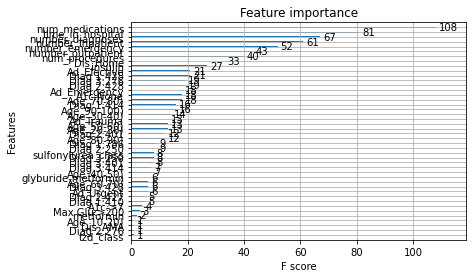

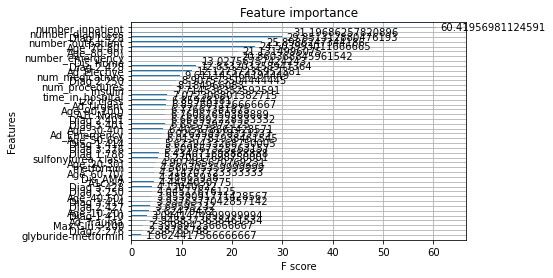

In [302]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

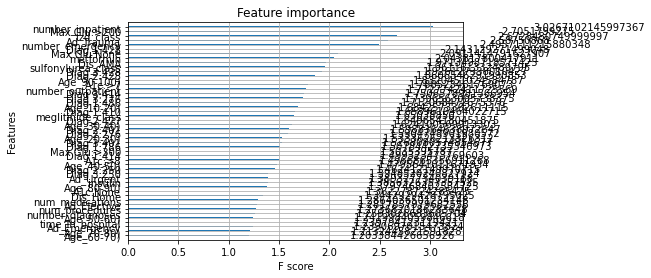

In [303]:
xgb.plot_importance(gbm2, importance_type='gain')

In [304]:
gbm.get_booster().get_score(importance_type='gain')

{'number_outpatient': 25.8986247344186,
 'Diag 1:428': 29.851312880476193,
 'num_medications': 9.611145464194449,
 'time_in_hospital': 7.072306801382715,
 'Diag 2:250': 8.907573504444445,
 'Ad_Elective': 12.12737235952381,
 'Dis_Home': 13.02756757424243,
 'number_inpatient': 60.41956981124591,
 'number_emergency': 20.860368845961542,
 'Diag 3:401': 6.65573972125,
 'number_diagnoses': 31.19686257820896,
 'Age_70-80)': 24.503993011666665,
 'Diag 2:428': 12.833203258947364,
 'Age_80-90)': 21.1314996075,
 'num_procedures': 8.184966083,
 'Age_90-100)': 6.77667381875,
 'Age_40-50)': 3.9539091771428567,
 'insulin': 7.714536352592591,
 'A1c:None': 6.76067650388889,
 'Diag 3:276': 5.509567325263157,
 'Diag 3:414': 3.9376377042857142,
 'Ad_Urgent': 6.857607126666667,
 'A1c:>7': 4.4424030775,
 'Age_30-40)': 6.405878661428571,
 'Age_20-30)': 4.907465670769231,
 'Diag 1:786': 5.434071698888888,
 'Diag 2:401': 6.663992228333332,
 'Age_50-60)': 6.0137781938461545,
 'Ad_Emergency': 6.026258378333333,


In [298]:
gbm2.get_booster().get_score(importance_type='gain')

{'number_emergency': 2.4957111215880348,
 'number_outpatient': 1.7727742411725569,
 'Diag 1:428': 2.143129271499048,
 'num_medications': 1.2864036501234148,
 'time_in_hospital': 1.239794123119421,
 'Age_80-90)': 1.3797468402584725,
 'Age_70-80)': 1.2132445821591828,
 'insulin': 1.3856326357357525,
 'sulfonylurea_class': 1.961161332489795,
 'Diag 1:410': 1.6589610464022715,
 'Diag 2:428': 1.8606546291990853,
 'Diag 3:250': 1.3948520240827924,
 'Age_60-70)': 1.203384426656926,
 'Age_30-40)': 1.624100569913303,
 'Diag 2:276': 1.5904748901980572,
 'Age_90-100)': 1.8320451024584787,
 'Ad_Elective': 1.2817857979682556,
 'Diag 3:401': 1.5268080574854677,
 'Diag 2:250': 1.462412149970715,
 'Ad_Urgent': 1.389327734039168,
 'num_procedures': 1.2736820186283648,
 'A1c:>8': 1.4966865356911268,
 'Age_40-50)': 1.4795641011671934,
 'Dis_Home': 1.3442929428795025,
 'A1c:None': 1.362278724285425,
 'Ad_Emergency': 1.2390697015473824,
 'Diag 2:401': 1.5988364638972647,
 'Diag 1:414': 1.499323473769603,
 

In [192]:
gbm3.get_booster().get_score(importance_type='gain')

{'number_diagnoses': 1.305531478617033,
 'number_emergency': 2.406717991579701,
 'Diag 1:428': 2.3074462066215458,
 'Dis_Home': 1.3898578518255165,
 'Age_70-80)': 1.2328987964659917,
 'insulin': 1.3357018613873977,
 'sulfonylurea_class': 1.8730155499219354,
 'A1c:>7': 1.5121885452489827,
 'num_procedures': 1.2561715350946352,
 'Max Glu:None': 2.231988442333333,
 'time_in_hospital': 1.2413006016862427,
 'number_outpatient': 1.718426192271074,
 'Diag 2:276': 1.6278154063652537,
 'num_medications': 1.2961639732506394,
 'Ad_Elective': 1.2542398375167223,
 'Age_60-70)': 1.2016778705393212,
 'Diag 3:250': 1.4024874193693238,
 'Age_50-60)': 1.3314972024148963,
 'Diag 2:250': 1.5132635109114154,
 'Diag 3:428': 1.833570250297154,
 'Diag 2:401': 1.5338444222386034,
 'Diag 1:786': 1.6378988641496508,
 'Diag 1:410': 1.6441988028334504,
 'Ad_Urgent': 1.4714019315450753,
 'Age_80-90)': 1.336426522970099,
 'Diag 2:427': 1.7350731107556774,
 'A1c:>8': 1.4817557884156791,
 'Age_10-20)': 1.7174911366804

In [63]:
X = df1.drop(columns=['target'])
y = df1['target']


X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
y.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]


X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.2, random_state=28)

X_train_scaled = StandardScaler().fit_transform(X_tr)


In [128]:
#plot ROC curves for all

rf_a = RandomForestClassifier(max_depth=30, class_weight='balanced')
rf_a.fit(X_tr,y_tr)

lr_a = LogisticRegression(C=0.7, class_weight='balanced')
lr_a.fit(X_train_scaled, y_tr)

xgb_a = xgb.XGBClassifier(max_depth=31,
                       objective="binary:logistic", 
                       learning_rate=0.2, 
                       subsample=0.4,
                       min_child_weight=1,
                       colsample_bytree=0.9)
xgb_a.fit(X_tr, y_tr)

/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=31,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)

/Users/zliao/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


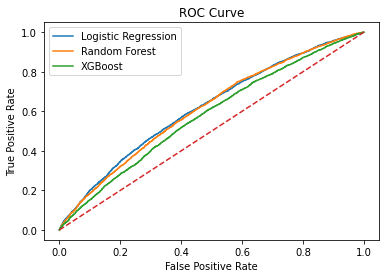

In [130]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, lr_a.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, rf_a.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, xgb_a.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)


x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','Random Forest', 'XGBoost'])

plt.savefig('roc_models')

## Final Model

Going with our logistic regression model:

In [205]:
#just trying out other regularization type
param_grid = {'penalty': ['l1', 'l2']} 

lr = LogisticRegression(C=0.7, class_weight='balanced', solver = 'liblinear')
tuning2_lr = GridSearchCV(lr, param_grid, cv=5, scoring=('accuracy', 'f1', 'precision', 'recall'), refit='f1')
tuning2_lr.fit(X_train_scaled, y_tr)


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.7, class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'penalty': ['l1', 'l2']}, refit='f1',
             scoring=('accuracy', 'f1', 'precision', 'recall'))

In [207]:
print(tuning2_lr.best_estimator_)
print(tuning2_lr.best_score_)
#almost exactly same

LogisticRegression(C=0.7, class_weight='balanced', penalty='l1',
                   solver='liblinear')
0.5217724457646042


In [64]:
lr_final = LogisticRegression(C=0.7, class_weight='balanced')
lr_final.fit(X_train_scaled, y_tr)

LogisticRegression(C=0.7, class_weight='balanced')

In [245]:
from sklearn.metrics import precision_recall_curve

In [65]:
X_test_scaled = StandardScaler().fit_transform(X_test)

In [66]:
# score on test set 
y_pred = lr_final.predict(X_test_scaled)
print('F1 score for test:', round(f1_score(y_test, y_pred), 4))
print('Accuracy score for test:', round(accuracy_score(y_test, y_pred), 4))

F1 score for test: 0.5294
Accuracy score for test: 0.6057


In [186]:
#from sklearn.metrics import log_loss

In [187]:
#baseline_prob = np.mean(y_train)

In [188]:
#baseline_prob

0.40497300925796437

In [189]:
#baseline_y_pred = [baseline_prob for _ in range(len(y_test))]
#avg_logloss = log_loss(y_test, baseline_y_pred)

In [191]:
#avg_logloss

0.6726045869434691

In [67]:
#units in log odds 
lr_final.coef_

array([[ 0.13172328,  0.06298283,  0.16764758,  0.10559208,  0.26997784,
        -0.00564289, -0.04816869, -0.00628343, -0.01378955,  0.07692654,
         0.16752294, -0.1322695 ,  0.12961216,  0.04821035,  0.04741609,
         0.08768571,  0.17485395,  0.24056223,  0.30479866,  0.37325691,
         0.30684838,  0.07187552,  0.01851897,  0.02916938,  0.08785522,
        -0.02238571,  0.01364016, -0.00120489, -0.00888015,  0.06638026,
        -0.09602208, -0.00533637,  0.01743486, -0.00285971,  0.02008694,
        -0.02055567,  0.02726391,  0.09685458,  0.00594835,  0.00695397,
        -0.02820854, -0.00519539, -0.03570432,  0.00208674,  0.06216549,
        -0.03972152, -0.02944304, -0.02948312, -0.01161445,  0.02409956]])

In [68]:
#units in odds
np.exp(lr_final.coef_)

array([[1.1407926 , 1.06500856, 1.18251979, 1.11136843, 1.30993542,
        0.99437301, 0.95297302, 0.99373627, 0.98630509, 1.07996274,
        1.18237241, 0.87610485, 1.13838678, 1.04939137, 1.04855821,
        1.09164498, 1.19107224, 1.27196409, 1.35635189, 1.45245745,
        1.35913488, 1.07452158, 1.01869151, 1.02959898, 1.09183004,
        0.97786299, 1.01373361, 0.99879583, 0.99115916, 1.068633  ,
        0.90844395, 0.99467784, 1.01758774, 0.99714438, 1.02029004,
        0.97965415, 1.02763897, 1.10170016, 1.00596608, 1.00697821,
        0.9721856 , 0.99481809, 0.96492556, 1.00208892, 1.06413843,
        0.96105703, 0.97098618, 0.97094726, 0.98845274, 1.0243923 ]])

In [71]:
X_tr.columns

Index(['number_diagnoses', 'time_in_hospital', 'number_emergency',
       'number_outpatient', 'number_inpatient', 'num_medications',
       'num_procedures', 'Dis_AMA', 'Dis_Home', 'Ad_Elective', 'Ad_Emergency',
       'Ad_Trauma', 'Ad_Urgent', 'Age_10-20)', 'Age_20-30)', 'Age_30-40)',
       'Age_40-50)', 'Age_50-60)', 'Age_60-70)', 'Age_70-80)', 'Age_80-90)',
       'Age_90-100)', 'A1c:>7', 'A1c:>8', 'A1c:None', 'Max Glu:>200',
       'Max Glu:>300', 'Max Glu:None', 'metformin', 'insulin',
       'glyburide-metformin', 'meglitinide_class', 'sulfonylurea_class',
       'tzd_class', 'agi_class', 'Diag 1:410', 'Diag 1:414', 'Diag 1:428',
       'Diag 1:486', 'Diag 1:786', 'Diag 2:250', 'Diag 2:276', 'Diag 2:401',
       'Diag 2:427', 'Diag 2:428', 'Diag 3:250', 'Diag 3:276', 'Diag 3:401',
       'Diag 3:414', 'Diag 3:428'],
      dtype='object')

In [72]:
coefficients = pd.concat([pd.DataFrame(X_tr.columns),pd.DataFrame(np.transpose(np.exp(lr_final.coef_)))], axis = 1)

In [73]:
coefficients

,0,0
0,number_diagnoses,1.140793
1,time_in_hospital,1.065009
2,number_emergency,1.182520
3,number_outpatient,1.111368
4,number_inpatient,1.309935
5,num_medications,0.994373
6,num_procedures,0.952973
7,Dis_AMA,0.993736
8,Dis_Home,0.986305
9,Ad_Elective,1.079963


In [74]:
X_tr.number_inpatient.std()

0.5959995860555259

In [75]:
X_tr.number_inpatient.mean()

0.17270457930397937

In [77]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47671 entries, 67178 to 53042
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   number_diagnoses     47671 non-null  int64
 1   time_in_hospital     47671 non-null  int64
 2   number_emergency     47671 non-null  int64
 3   number_outpatient    47671 non-null  int64
 4   number_inpatient     47671 non-null  int64
 5   num_medications      47671 non-null  int64
 6   num_procedures       47671 non-null  int64
 7   Dis_AMA              47671 non-null  uint8
 8   Dis_Home             47671 non-null  uint8
 9   Ad_Elective          47671 non-null  uint8
 10  Ad_Emergency         47671 non-null  uint8
 11  Ad_Trauma            47671 non-null  uint8
 12  Ad_Urgent            47671 non-null  uint8
 13  Age_10-20)           47671 non-null  uint8
 14  Age_20-30)           47671 non-null  uint8
 15  Age_30-40)           47671 non-null  uint8
 16  Age_40-50)        

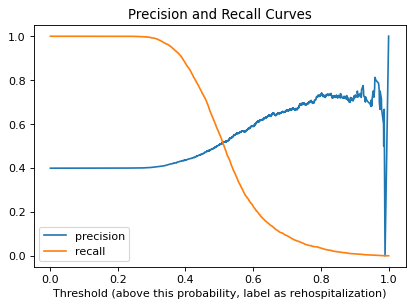

In [185]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr_final.predict_proba(X_test_scaled)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as rehospitalization)');
plt.title('Precision and Recall Curves')

plt.savefig('precision_vs_recall')


In [183]:
#what if changed threshold? 
y_pred2 = (lr_final.predict_proba(X_test_scaled)[:,1] > 0.55)
print('F1 score for test if threshold 0.55:', round(f1_score(y_test, y_pred2), 4))
print('Accuracy score for test if threshold 0.55:', round(accuracy_score(y_test, y_pred2), 4))

F1 score for test if threshold 0.55: 0.4375
Accuracy score for test if threshold 0.55: 0.6294


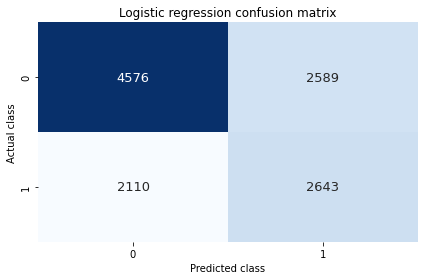

In [101]:
#confusion matrix
lr_final_cm = confusion_matrix(y_test, y_pred)

sns.heatmap(lr_final_cm, cmap=plt.cm.Blues, annot=True,annot_kws={"fontsize":13}, fmt='d', cbar=False)

plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Logistic regression confusion matrix')
plt.tight_layout()
plt.savefig('final_cm')

In [309]:
# SHAP

In [79]:
import shap


In [84]:
explainer = shap.LinearExplainer(lr_final, X_train_scaled,feature_dependence="independent")
shap_values = explainer(X_test_scaled)
X_test_array = X_test_scaled

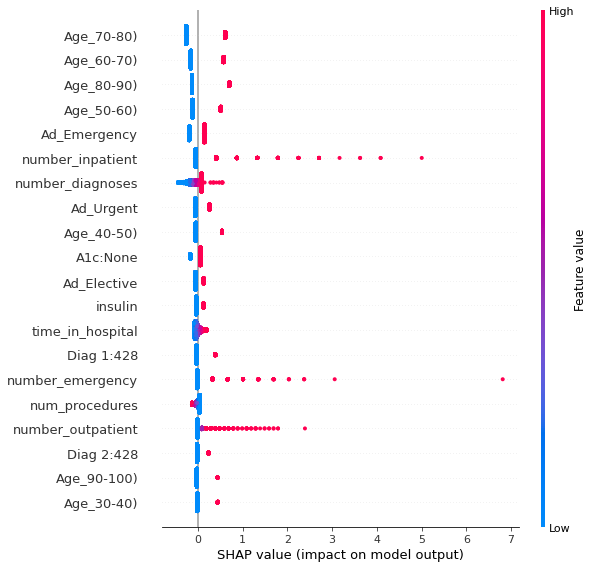

In [85]:
shap.summary_plot(shap_values, X_test_array, list(X_tr.columns))

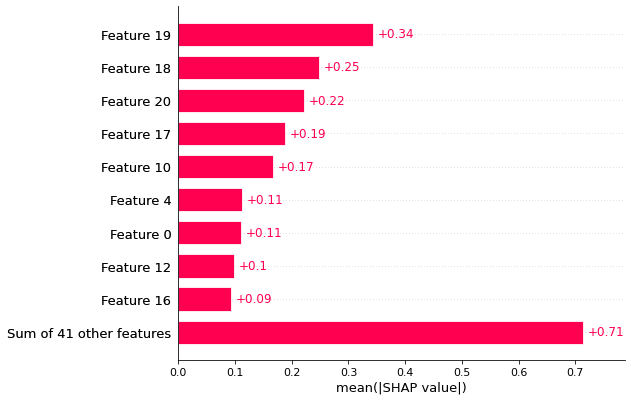

In [83]:
shap.plots.bar(shap_values)

In [160]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35753 entries, 31873 to 42548
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   number_diagnoses     35753 non-null  int64
 1   time_in_hospital     35753 non-null  int64
 2   number_emergency     35753 non-null  int64
 3   number_outpatient    35753 non-null  int64
 4   number_inpatient     35753 non-null  int64
 5   num_medications      35753 non-null  int64
 6   num_procedures       35753 non-null  int64
 7   Dis_AMA              35753 non-null  uint8
 8   Dis_Home             35753 non-null  uint8
 9   Ad_Elective          35753 non-null  uint8
 10  Ad_Emergency         35753 non-null  uint8
 11  Ad_Trauma            35753 non-null  uint8
 12  Ad_Urgent            35753 non-null  uint8
 13  Age_10-20)           35753 non-null  uint8
 14  Age_20-30)           35753 non-null  uint8
 15  Age_30-40)           35753 non-null  uint8
 16  Age_40-50)        

Other analyses

In [315]:
smaller_df.race.value_counts()

Caucasian          44052
AfricanAmerican    11214
?                   1782
Hispanic            1146
Other                976
Asian                419
Name: race, dtype: int64

In [316]:
smaller_df.gender.value_counts()

Female             31774
Male               27812
Unknown/Invalid        3
Name: gender, dtype: int64